In [1423]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [1424]:
df=pd.read_csv('/content/accident.csv')

In [1425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [1426]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [1427]:
df['Survived'].value_counts()

,count
Survived,
1,101
0,99


In [1428]:
df.isna().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [1429]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

<ipython-input-1429-cb1f6dce8dc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [1430]:
df["Speed_of_Impact"].fillna(df["Speed_of_Impact"].mean(), inplace=True)

<ipython-input-1430-b1505ae16a3b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Speed_of_Impact"].fillna(df["Speed_of_Impact"].mean(), inplace=True)


In [1431]:
df.isna().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [1432]:
df.duplicated().sum()

0

In [1433]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Helmet_Used"] = encoder.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = encoder.fit_transform(df["Seatbelt_Used"])

In [1434]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


In [1435]:
# 1-What is the average age of accident victims?
df['Age'].mean()

43.425

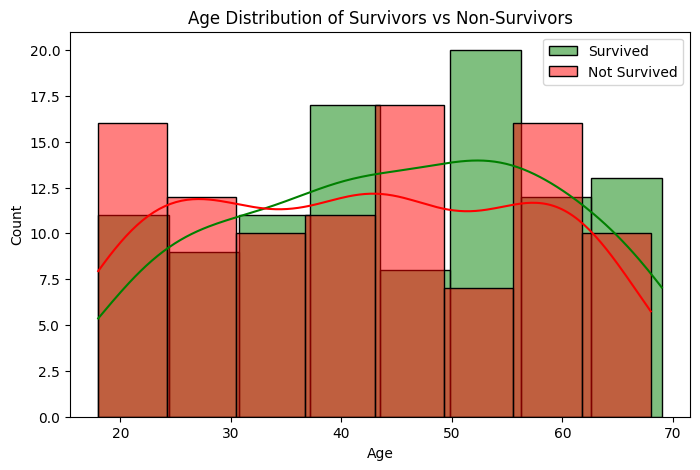

In [1436]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived'] == 1]['Age'], color="green", label="Survived", kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], color="red", label="Not Survived", kde=True)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()

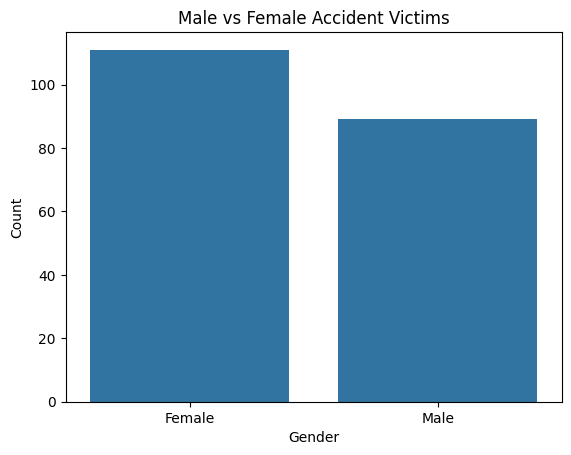

In [1437]:
# 2-What is the proportion of male to female accident victims?
sns.countplot(x=df["Gender"])
plt.xticks([0,1], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male vs Female Accident Victims")
plt.show()

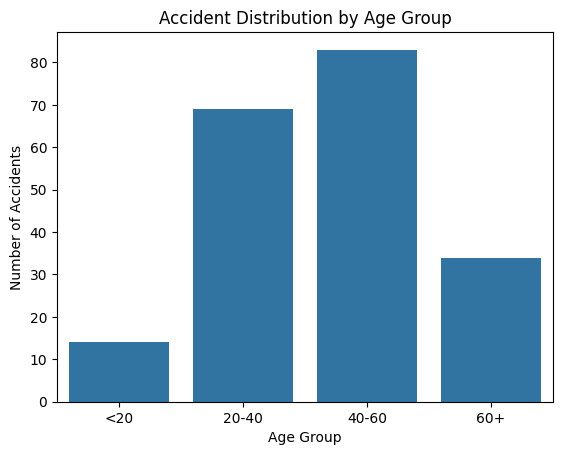

In [1438]:
# 3-Are there specific age groups that are more prone to accidents?
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['<20', '20-40', '40-60', '60+'])
sns.countplot(x='Age_Group', data=df)
plt.xlabel("Age Group")
plt.ylabel("Number of Accidents")
plt.title("Accident Distribution by Age Group")
plt.show()

<ipython-input-1439-257add3991d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Helmet_Used', y='Survived', data=df, errorbar=None, palette=['red', 'green'])


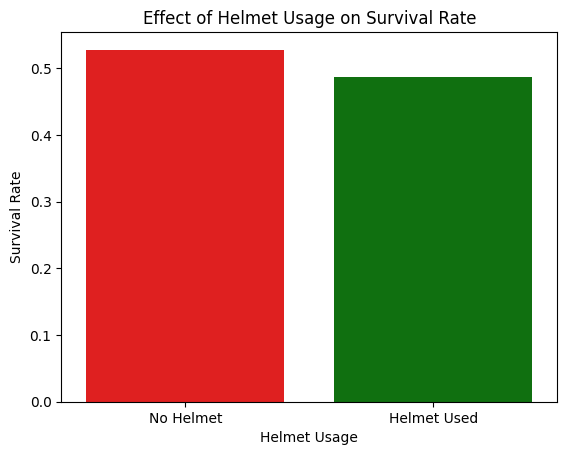

In [1439]:
#	4-How does helmet usage correlate with survival rates?
sns.barplot(x='Helmet_Used', y='Survived', data=df, errorbar=None, palette=['red', 'green'])
plt.xticks([0, 1], ["No Helmet", "Helmet Used"])
plt.xlabel("Helmet Usage")
plt.ylabel("Survival Rate")
plt.title("Effect of Helmet Usage on Survival Rate")
plt.show()

Percentage of survivors who wore a seatbelt: 53.15%
Percentage of survivors who did not wear a seatbelt: 47.19%


<ipython-input-1440-6dde96e210f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates.values, palette=['red', 'green'])


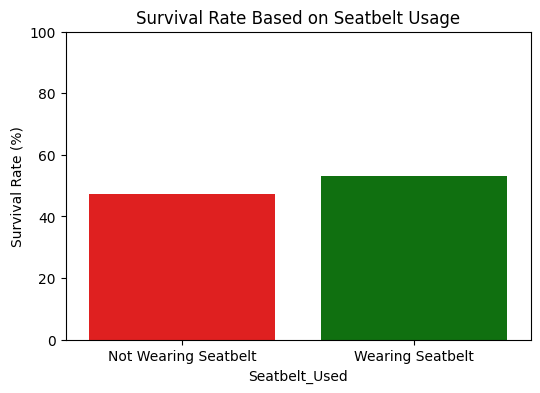

In [1440]:
# 5-What percentage of accident victims were wearing seatbelts?
survival_rates = df.groupby('Seatbelt_Used')['Survived'].mean() * 100
print(f"Percentage of survivors who wore a seatbelt: {survival_rates.get(1, 0):.2f}%")
print(f"Percentage of survivors who did not wear a seatbelt: {survival_rates.get(0, 0):.2f}%")
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette=['red', 'green'])
plt.xticks([0, 1], ["Not Wearing Seatbelt", "Wearing Seatbelt"])
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate Based on Seatbelt Usage")
plt.ylim(0, 100)
plt.show()

In [1441]:
# 6-How does seatbelt usage affect survival rates?
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
count = df.groupby('Seatbelt_Used')['Survived'].sum().values
nobs = df['Seatbelt_Used'].value_counts().sort_index().values
z_stat, p_value = smprop.proportions_ztest(count, nobs)
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:print("There is a statistically significant difference in survival rates between the two groups.")
else:print("There is NO statistically significant difference in survival rates between the two groups.")

Z-Statistic: -0.8381
P-value: 0.4020
There is NO statistically significant difference in survival rates between the two groups.


Total victims who used both a helmet and a seatbelt: 66
Survivors: 32
Non-survivors: 34


<ipython-input-1442-fd0832c5c348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[survived_victims, not_survived_victims], palette=['green', 'red'])


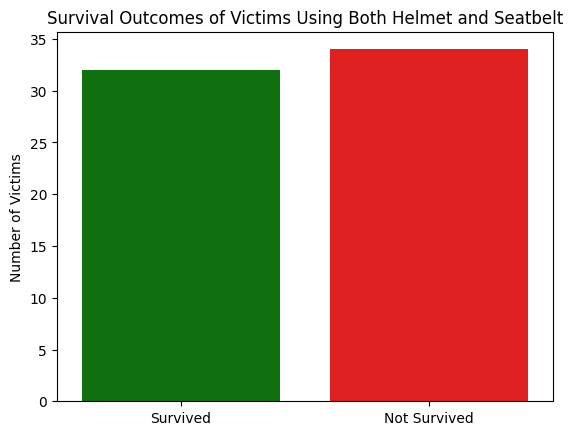

In [1442]:
# 7-How many victims used both a helmet and a seatbelt, and what were their survival outcomes?
helmet_seatbelt_users = df[(df['Helmet_Used'] == 1) & (df['Seatbelt_Used'] == 1)]
total_victims = helmet_seatbelt_users.shape[0]
survived_victims = helmet_seatbelt_users[helmet_seatbelt_users['Survived'] == 1].shape[0]
not_survived_victims = total_victims - survived_victims
print(f"Total victims who used both a helmet and a seatbelt: {total_victims}")
print(f"Survivors: {survived_victims}")
print(f"Non-survivors: {not_survived_victims}")
sns.barplot(x=['Survived', 'Not Survived'], y=[survived_victims, not_survived_victims], palette=['green', 'red'])
plt.ylabel('Number of Victims')
plt.title('Survival Outcomes of Victims Using Both Helmet and Seatbelt')
plt.show()

Highest recorded impact speed: 119.0
Number of survivors: 1
Number of non-survivors: 1


<ipython-input-1443-ddb2590b77cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[survived, not_survived], palette=['green', 'red'])


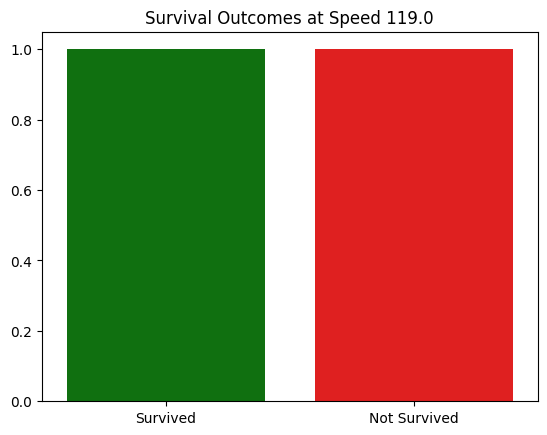

In [1443]:
#8-What is the highest recorded speed of impact in the dataset, and what were the outcomes?
max_speed = df['Speed_of_Impact'].max()
high_speed_cases = df[df['Speed_of_Impact'] == max_speed]
survived = (high_speed_cases['Survived'] == 1).sum()
not_survived = (high_speed_cases['Survived'] == 0).sum()
print(f"Highest recorded impact speed: {max_speed}")
print(f"Number of survivors: {survived}")
print(f"Number of non-survivors: {not_survived}")
sns.barplot(x=['Survived', 'Not Survived'], y=[survived, not_survived], palette=['green', 'red'])
plt.title(f'Survival Outcomes at Speed {max_speed}')
plt.show()

The critical speed category at which survival rate drops significantly: low


<ipython-input-1444-41fd02176c84>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates, palette="coolwarm")


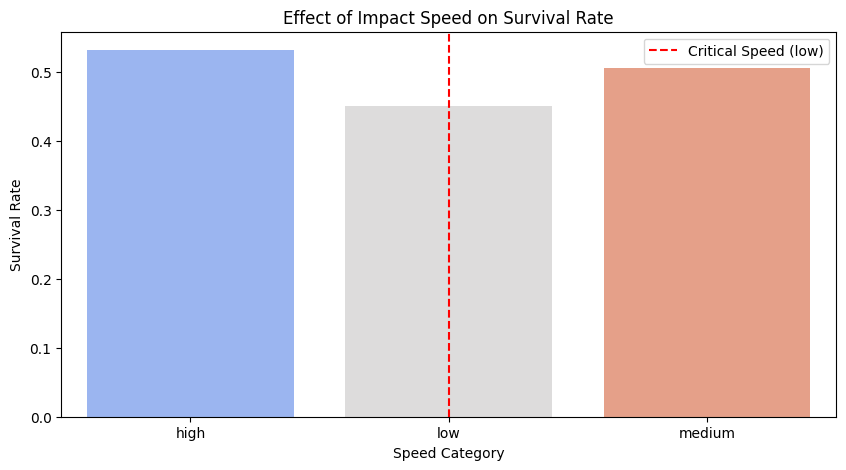

In [1444]:
def categorize_speed(speed):
    if speed < 40:
        return 'low'
    elif speed < 80:
        return 'medium'
    else:
        return 'high'
df['Speed_Category'] = df['Speed_of_Impact'].apply(categorize_speed)
survival_rates = df.groupby('Speed_Category')['Survived'].mean()
threshold_speed = survival_rates[survival_rates.diff() < -0.05].index[0] if any(survival_rates.diff() < -0.05) else "No significant drop"
print(f"The critical speed category at which survival rate drops significantly: {threshold_speed}")
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_rates.index, y=survival_rates, palette="coolwarm")
if threshold_speed != "No significant drop":
    plt.axvline(survival_rates.index.tolist().index(threshold_speed), color='red', linestyle='--', label=f"Critical Speed ({threshold_speed})")
plt.xlabel("Speed Category")
plt.ylabel("Survival Rate")
plt.title("Effect of Impact Speed on Survival Rate")
plt.legend()
plt.show()

Gender
0    0.450450
1    0.573034
Name: Survived, dtype: float64


<ipython-input-1445-68f13484a1f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates_gender.index, y=survival_rates_gender.values, palette=['blue', 'pink'])


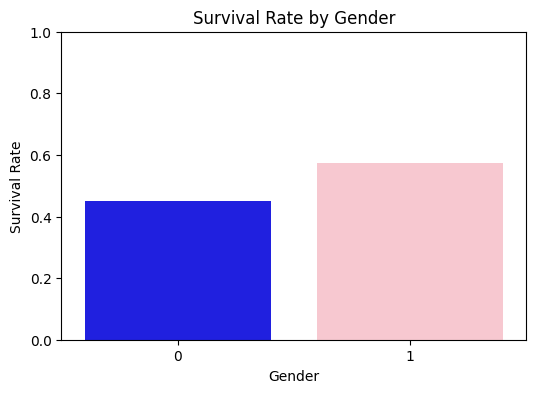

In [1445]:
#10-Are males or females more likely to survive accidents?
survival_rates_gender = df.groupby('Gender')['Survived'].mean()
print(survival_rates_gender)
plt.figure(figsize=(6,4))
sns.barplot(x=survival_rates_gender.index, y=survival_rates_gender.values, palette=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.ylim(0, 1)
plt.show()

<ipython-input-1446-c940c1809c96>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_age = df.groupby('Age_Group')['Survived'].mean()


Age_Group
10-20    0.357143
20-30    0.441176
30-40    0.514286
40-50    0.511628
50-60    0.550000
60-70    0.558824
Name: Survived, dtype: float64


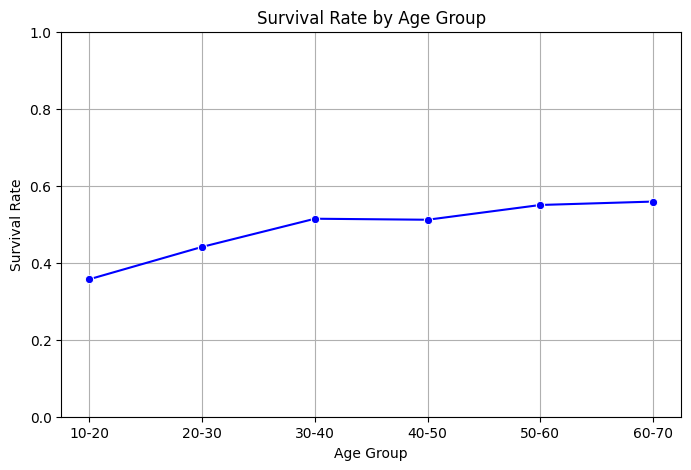

In [1446]:
#11-Do younger individuals have a higher survival rate than older individuals?
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70],labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"])
survival_rates_age = df.groupby('Age_Group')['Survived'].mean()
print(survival_rates_age)
plt.figure(figsize=(8,5))
sns.lineplot(x=survival_rates_age.index, y=survival_rates_age.values, marker='o', color='blue')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Used_Safety
False    0.454545
True     0.519231
Name: Survived, dtype: float64


<ipython-input-1447-7307ececae1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates_safety.index, y=survival_rates_safety.values, palette=['red', 'green'])


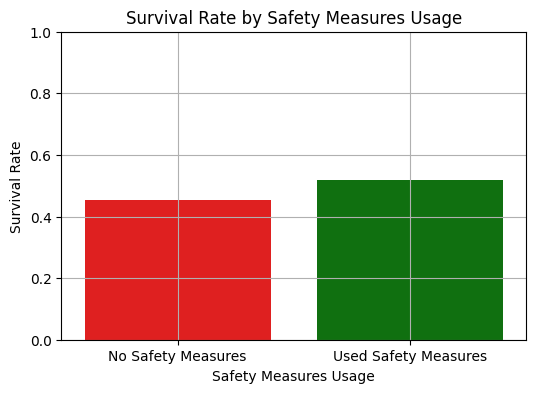

In [1447]:
#12-How do accident outcomes differ between individuals who used at least one safety measure vs. those who used none?
df['Used_Safety'] = (df['Helmet_Used'] == 1) | (df['Seatbelt_Used'] == 1)
survival_rates_safety = df.groupby('Used_Safety')['Survived'].mean()
print(survival_rates_safety)
plt.figure(figsize=(6,4))
sns.barplot(x=survival_rates_safety.index, y=survival_rates_safety.values, palette=['red', 'green'])
plt.xticks([0,1], ['No Safety Measures', 'Used Safety Measures'])
plt.xlabel("Safety Measures Usage")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Safety Measures Usage")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

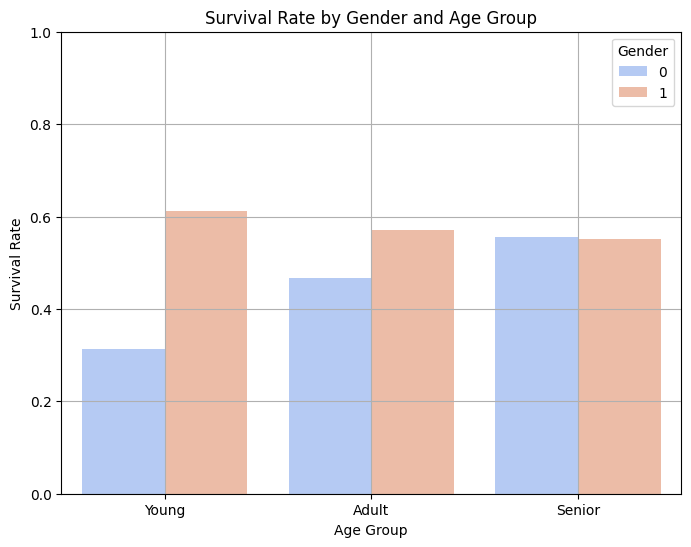

In [1448]:
#13-Do gender and age interact to influence survival rates in accidents?
bins = [18, 35, 50, 69]
labels = ['Young', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
survival_rates = df.groupby(['Gender', 'Age_Group'], observed=True)['Survived'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Age_Group', y='Survived', hue='Gender', data=survival_rates, palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender and Age Group")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [1449]:
df.dtypes

,0
Age,int64
Gender,int64
Speed_of_Impact,float64
Helmet_Used,int64
Seatbelt_Used,int64
Survived,int64
Age_Group,category
Speed_Category,object
Used_Safety,bool


In [1450]:
df = df.drop(columns=['Age', 'Helmet_Used', 'Seatbelt_Used','Speed_of_Impact'])


In [1451]:
df.head()

,Gender,Survived,Age_Group,Speed_Category,Used_Safety
0,0,1,Senior,low,False
1,0,1,Senior,medium,True
2,1,0,Adult,medium,True
3,1,0,Young,high,True
4,0,0,Senior,medium,True


In [1452]:
df.isnull().sum()

,0
Gender,0
Survived,0
Age_Group,5
Speed_Category,0
Used_Safety,0


In [1453]:
df['Age_Group'] = df['Age_Group'].fillna(df['Age_Group'].mode()[0])

In [1454]:
df.isnull().sum()

,0
Gender,0
Survived,0
Age_Group,0
Speed_Category,0
Used_Safety,0


In [1455]:
age_group_mapping = {'Young': 0, 'Adult': 1, 'Senior': 2}
df['Age_Group'] = df['Age_Group'].map(age_group_mapping)
speed_category_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['Speed_Category'] = df['Speed_Category'].map(speed_category_mapping)

In [1456]:
df['Used_Safety'] = df['Used_Safety'].astype(int)

In [1457]:
df.head()

,Gender,Survived,Age_Group,Speed_Category,Used_Safety
0,0,1,2,0,0
1,0,1,2,1,1
2,1,0,1,1,1
3,1,0,0,2,1
4,0,0,2,1,1


In [1458]:
df.drop_duplicates()

,Gender,Survived,Age_Group,Speed_Category,Used_Safety
0,0,1,2,0,0
1,0,1,2,1,1
2,1,0,1,1,1
3,1,0,0,2,1
4,0,0,2,1,1
...,...,...,...,...,...
165,0,0,1,2,0
169,1,1,2,2,0
175,1,1,2,1,0
176,0,1,1,2,0


In [1459]:
df.duplicated().sum()

139

In [1460]:
features = ['Age_Group', 'Speed_Category', 'Used_Safety', 'Gender']
X = df[features]
y = df['Survived']

In [1461]:
df.head()

,Gender,Survived,Age_Group,Speed_Category,Used_Safety
0,0,1,2,0,0
1,0,1,2,1,1
2,1,0,1,1,1
3,1,0,0,2,1
4,0,0,2,1,1


In [1462]:
df['Age_Group'].value_counts()

,count
Age_Group,
2,79
0,63
1,58


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        33
           1       0.50      0.41      0.45        27

    accuracy                           0.55        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.55      0.54        60



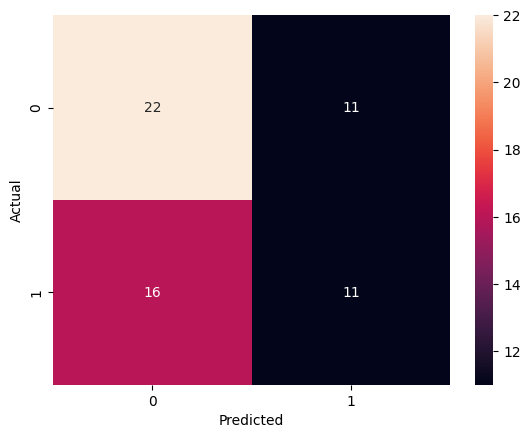

In [1469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        33
           1       0.48      0.48      0.48        27

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.53      0.53      0.53        60



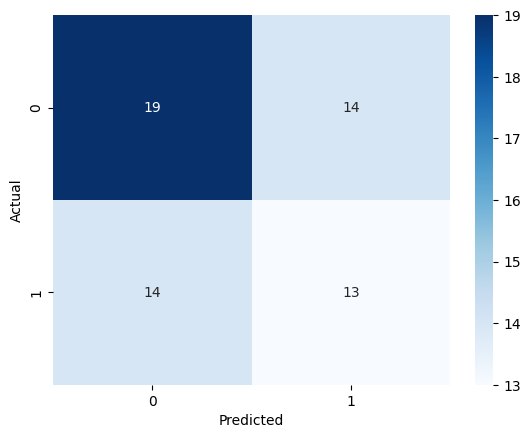

In [1478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k = 1 # عدد الجيران
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

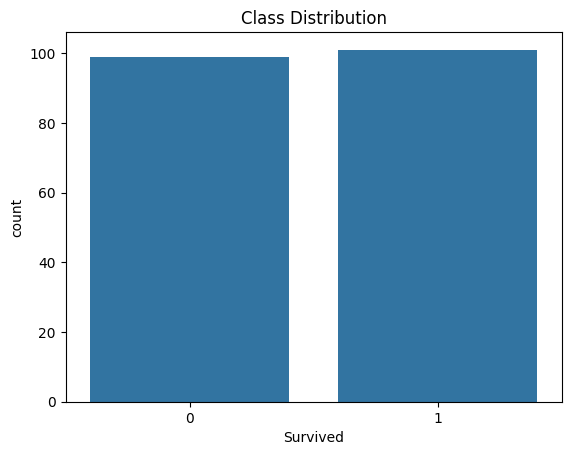

Survived
1    0.505
0    0.495
Name: proportion, dtype: float64


In [1481]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

print(y.value_counts(normalize=True))


In [1483]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)
accuracy_dummy = accuracy_score(y_test, y_dummy)
print(f"Dummy Accuracy: {accuracy_dummy:.2f}")

Dummy Accuracy: 0.45
